In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
movies_df = pd.read_csv("data_movie.csv")
movies_df

,movie_id,title,year,release,trivia,mpaa,run_time,director,writer,producer,...,main_actor_2,main_actor_3,main_actor_4,budget,domestic,worldwide,genre_1,genre_2,genre_3,genre_4
0,m0001,Pretty Woman,1990,1990-03-22,A man in a legal but hurtful business needs an...,R,119,Garry Marshall,J.F. Lawton,Arnon Milchan,...,Julia Roberts,Jason Alexander,Laura San Giacomo,14000000.0,178406268.0,4.634063e+08,Comedy,Romance,NaN,NaN
1,m0002,The Godfather: Part III,1990,1990-12-24,In the midst of trying to legitimize his busin...,R,162,Francis Ford Coppola,Mario Puzo,Francis Ford Coppola,...,Diane Keaton,Andy Garcia,Talia Shire,54000000.0,66666062.0,1.367661e+08,Crime,Drama,NaN,NaN
2,m0003,Thelma & Louise,1991,1991-05-23,"Two best friends set out on an adventure, but ...",R,130,Ridley Scott,Callie Khouri,Mimi Polk Gitlin,...,Geena Davis,Harvey Keitel,Michael Madsen,16500000.0,45360915.0,4.543480e+07,Adventure,Crime,Drama,NaN
3,m0004,Terminator 2: Judgment Day,1991,1991-07-02,"A cyborg, identical to the one who failed to k...",R,137,James Cameron,James Cameron,James Cameron,...,Linda Hamilton,Edward Furlong,Robert Patrick,102000000.0,205881154.0,5.208848e+08,Action,Sci-Fi,NaN,NaN
4,m0005,Boyz n the Hood,1991,1991-07-11,Follows the lives of three young males living ...,R,112,John Singleton,John Singleton,Steve Nicolaides,...,Laurence Fishburne,Hudhail Al-Amir,Lloyd Avery II,6500000.0,57504069.0,5.752907e+07,Crime,Drama,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,m1140,Ready Player One,2018,2018-03-27,When the creator of a virtual reality called t...,PG-13,140,Steven Spielberg,Zak Penn,Donald De Line,...,Olivia Cooke,Ben Mendelsohn,Lena Waithe,175000000.0,137690172.0,5.828902e+08,Action,Adventure,Sci-Fi,NaN
1140,m1141,A Quiet Place,2018,2018-04-03,"In a post-apocalyptic world, a family is force...",PG-13,90,John Krasinski,Bryan Woods,Michael Bay,...,John Krasinski,Millicent Simmonds,Noah Jupe,17000000.0,188024361.0,3.409394e+08,Drama,Horror,Sci-Fi,NaN
1141,m1142,Deadpool 2,2018,2018-05-15,Foul-mouthed mutant mercenary Wade Wilson a.k....,R,119,David Leitch,Rhett Reese,Simon Kinberg,...,Josh Brolin,Morena Baccarin,Julian Dennison,110000000.0,324591735.0,7.857942e+08,Action,Adventure,Comedy,Sci-Fi
1142,m1143,Spider-Man: Into the Spider-Verse,2018,2018-12-11,Teen Miles Morales becomes Spider-Man of his r...,PG,117,Bob Persichetti,Phil Lord,Avi Arad,...,Jake Johnson,Hailee Steinfeld,Mahershala Ali,90000000.0,190241310.0,3.755408e+08,Action,Adventure,Animation,Family


In [5]:
movies_df.describe()

,year,run_time,budget,domestic,worldwide
count,1144.000000,1144.000000,1.144000e+03,1.144000e+03,1.144000e+03
mean,2004.451923,115.802448,6.809859e+07,1.035710e+08,2.402453e+08
std,6.180527,20.624955,5.553107e+07,1.005937e+08,2.770393e+08
min,1990.000000,77.000000,7.000000e+03,3.047100e+04,3.047100e+04
25%,2000.000000,101.000000,2.700000e+07,3.815977e+07,7.143258e+07
50%,2004.000000,113.000000,5.200000e+07,7.210151e+07,1.549584e+08
75%,2009.000000,128.000000,9.225000e+07,1.335411e+08,2.975740e+08
max,2019.000000,242.000000,3.560000e+08,9.366622e+08,2.797801e+09


# Check for duplicates

In [6]:
movies_df[movies_df.duplicated(keep=False)]

,movie_id,title,year,release,trivia,mpaa,run_time,director,writer,producer,...,main_actor_2,main_actor_3,main_actor_4,budget,domestic,worldwide,genre_1,genre_2,genre_3,genre_4


No duplicates

# Check data types

In [7]:
movies_df.dtypes

movie_id         object
title            object
year              int64
release          object
trivia           object
mpaa             object
run_time          int64
director         object
writer           object
producer         object
composer         object
main_actor_1     object
main_actor_2     object
main_actor_3     object
main_actor_4     object
budget          float64
domestic        float64
worldwide       float64
genre_1          object
genre_2          object
genre_3          object
genre_4          object
dtype: object

In [8]:
# movies_df["release"] = pd.to_datetime(movies_df["release"]) # change to datetime format
# movies_df.dtypes 

# Check for missing values

In [9]:
movies_df.isnull().sum()

movie_id          0
title             0
year              0
release           0
trivia            0
mpaa              0
run_time          0
director          0
writer            0
producer          0
composer          0
main_actor_1      0
main_actor_2      0
main_actor_3      0
main_actor_4      0
budget            0
domestic          0
worldwide         0
genre_1           0
genre_2          72
genre_3         304
genre_4         725
dtype: int64

Key features don't seem to have missing values

## Dropping columns with excessive nans: genre_3, genre_4

In [10]:
movies_df.drop(columns = ["genre_3", "genre_4"], axis = 1, inplace=True)

# Check for outliers using IQR

In [11]:
from pandas.api.types import is_numeric_dtype
for col in movies_df.columns:
    if is_numeric_dtype(movies_df[col]) == True:
        series = movies_df[col]
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        outliers = 0
        for x in series:
            if x > (q3 + (1.5 * iqr)) or x < (q1 - (1.5*iqr)):
                outliers += 1
                
        print(series.name + " has " + str(outliers) + " outliers")


year has 0 outliers
run_time has 22 outliers
budget has 45 outliers
domestic has 76 outliers
worldwide has 95 outliers


## Removing outliers based on IQR

In [12]:
from pandas.api.types import is_numeric_dtype
for col in movies_df.columns:
    if is_numeric_dtype(movies_df[col]) == True:
        series = movies_df[col]
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        for x in series:
            if x > (q3 + (1.5 * iqr)) or x < (q1 - (1.5*iqr)):
                series.replace(x, np.nan, inplace=True) # Replace outliers with nan
                

In [13]:
movies_df.isnull().sum()

movie_id         0
title            0
year             0
release          0
trivia           0
mpaa             0
run_time        22
director         0
writer           0
producer         0
composer         0
main_actor_1     0
main_actor_2     0
main_actor_3     0
main_actor_4     0
budget          45
domestic        76
worldwide       95
genre_1          0
genre_2         72
dtype: int64

In [14]:
movies_df.shape

(1144, 20)

In [15]:
movies_df.dropna(axis = 0,inplace=True) # Only rows with more than 2 nan values are dropped

In [16]:
movies_df.isnull().sum()

movie_id        0
title           0
year            0
release         0
trivia          0
mpaa            0
run_time        0
director        0
writer          0
producer        0
composer        0
main_actor_1    0
main_actor_2    0
main_actor_3    0
main_actor_4    0
budget          0
domestic        0
worldwide       0
genre_1         0
genre_2         0
dtype: int64

In [17]:
movies_df

,movie_id,title,year,release,trivia,mpaa,run_time,director,writer,producer,composer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,worldwide,genre_1,genre_2
0,m0001,Pretty Woman,1990,1990-03-22,A man in a legal but hurtful business needs an...,R,119.0,Garry Marshall,J.F. Lawton,Arnon Milchan,James Newton Howard,Richard Gere,Julia Roberts,Jason Alexander,Laura San Giacomo,14000000.0,178406268.0,463406268.0,Comedy,Romance
1,m0002,The Godfather: Part III,1990,1990-12-24,In the midst of trying to legitimize his busin...,R,162.0,Francis Ford Coppola,Mario Puzo,Francis Ford Coppola,Carmine Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,54000000.0,66666062.0,136766062.0,Crime,Drama
2,m0003,Thelma & Louise,1991,1991-05-23,"Two best friends set out on an adventure, but ...",R,130.0,Ridley Scott,Callie Khouri,Mimi Polk Gitlin,Hans Zimmer,Susan Sarandon,Geena Davis,Harvey Keitel,Michael Madsen,16500000.0,45360915.0,45434805.0,Adventure,Crime
3,m0004,Terminator 2: Judgment Day,1991,1991-07-02,"A cyborg, identical to the one who failed to k...",R,137.0,James Cameron,James Cameron,James Cameron,Brad Fiedel,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,102000000.0,205881154.0,520884847.0,Action,Sci-Fi
4,m0005,Boyz n the Hood,1991,1991-07-11,Follows the lives of three young males living ...,R,112.0,John Singleton,John Singleton,Steve Nicolaides,Stanley Clarke,Cuba Gooding Jr.,Laurence Fishburne,Hudhail Al-Amir,Lloyd Avery II,6500000.0,57504069.0,57529070.0,Crime,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,m1136,Blade Runner 2049,2017,2017-10-03,Young Blade Runner K's discovery of a long-bur...,R,164.0,Denis Villeneuve,Hampton Fancher,Broderick Johnson,Benjamin Wallfisch,Harrison Ford,Ryan Gosling,Ana de Armas,Dave Bautista,150000000.0,92054159.0,259239658.0,Action,Drama
1138,m1139,Annihilation,2018,2018-02-22,"A biologist signs up for a dangerous, secret e...",R,115.0,Alex Garland,Alex Garland,Eli Bush,Geoff Barrow,Natalie Portman,Jennifer Jason Leigh,Tessa Thompson,Benedict Wong,40000000.0,32732301.0,43070915.0,Adventure,Drama
1139,m1140,Ready Player One,2018,2018-03-27,When the creator of a virtual reality called t...,PG-13,140.0,Steven Spielberg,Zak Penn,Donald De Line,Alan Silvestri,Tye Sheridan,Olivia Cooke,Ben Mendelsohn,Lena Waithe,175000000.0,137690172.0,582890172.0,Action,Adventure
1140,m1141,A Quiet Place,2018,2018-04-03,"In a post-apocalyptic world, a family is force...",PG-13,90.0,John Krasinski,Bryan Woods,Michael Bay,Marco Beltrami,Emily Blunt,John Krasinski,Millicent Simmonds,Noah Jupe,17000000.0,188024361.0,340939361.0,Drama,Horror


# Viz

## Histograms

In [24]:
hist_columns = ["mpaa", "genre_1", "genre_2"]

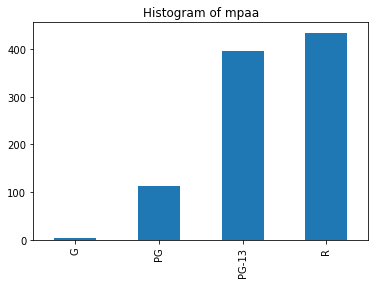

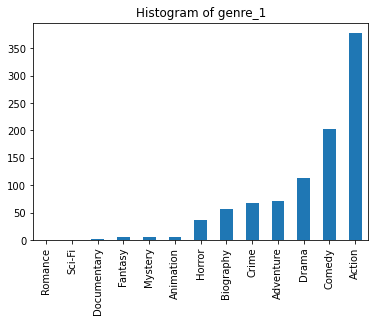

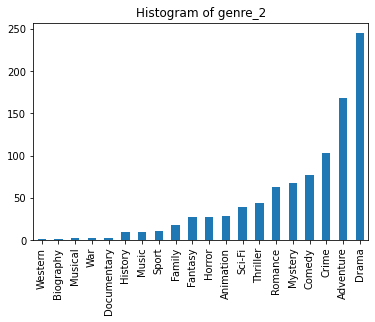

In [223]:
for col in hist_columns:
    movies_df[col].value_counts().sort_values().plot(kind = 'bar', title = f"Histogram of {col}")
    # movies_df[col].hist(figsize = (16,5), grid = False, xrot = 90)
    plt.show()

## Descriptive Stats

In [233]:
movies_df.describe()

,year,run_time,budget,domestic,worldwide
count,947.000000,947.000000,9.470000e+02,9.470000e+02,9.470000e+02
mean,2003.977825,113.417107,5.879206e+07,8.010056e+07,1.734324e+08
std,5.984347,17.356973,4.240271e+07,5.598592e+07,1.385317e+08
min,1990.000000,77.000000,7.000000e+03,3.047100e+04,3.047100e+04
25%,2000.000000,100.500000,2.600000e+07,3.671334e+07,6.695818e+07
50%,2004.000000,112.000000,5.000000e+07,6.545231e+07,1.334409e+08
75%,2008.000000,124.000000,8.150000e+07,1.139291e+08,2.394606e+08
max,2018.000000,168.000000,1.900000e+08,2.676650e+08,6.317462e+08


In [230]:
from pandas.api.types import is_numeric_dtype
def visualize_srs(series, name):
    if is_numeric_dtype(series) == True:
        fig, axes = plt.subplots(nrows = 3, ncols =1)
        series.plot(kind = "box", ax = axes[0], figsize = (10,10), title = f"Descriptive plots of {name}")
        series.plot(kind = "kde", ax = axes[1])
        series.plot(kind = "hist", ax = axes[2])
    else:
        return

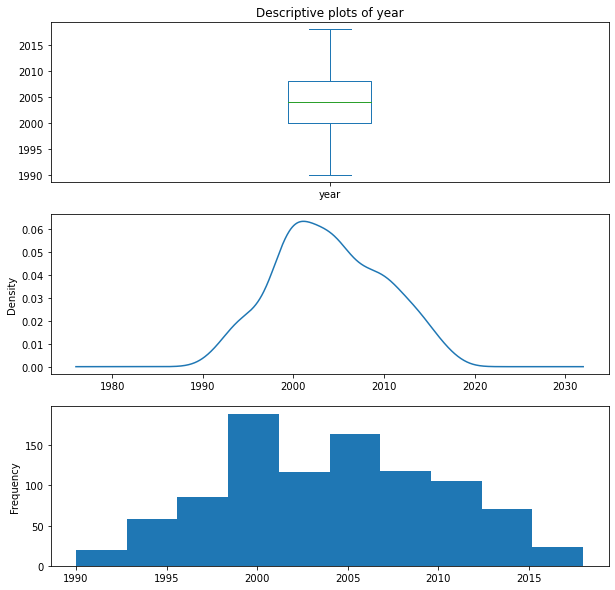

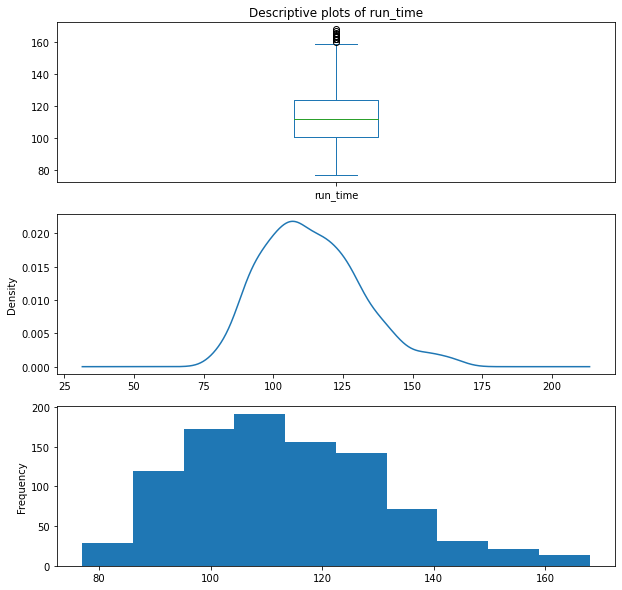

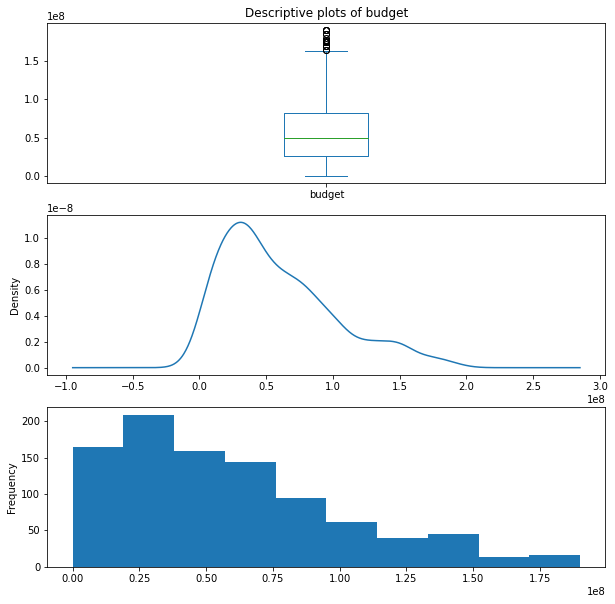

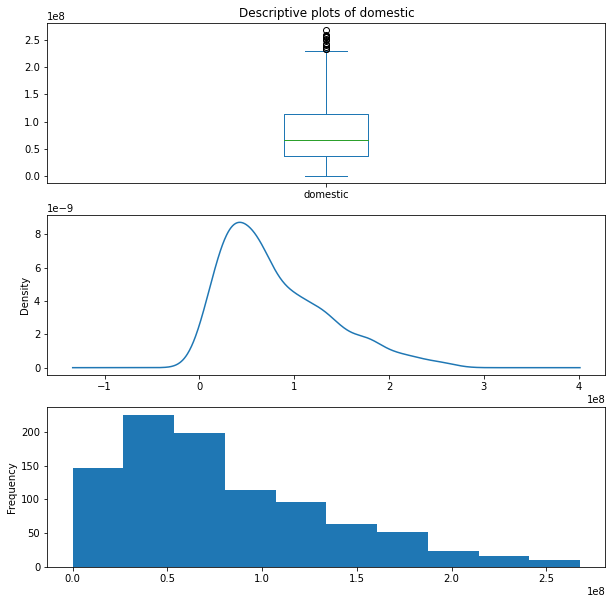

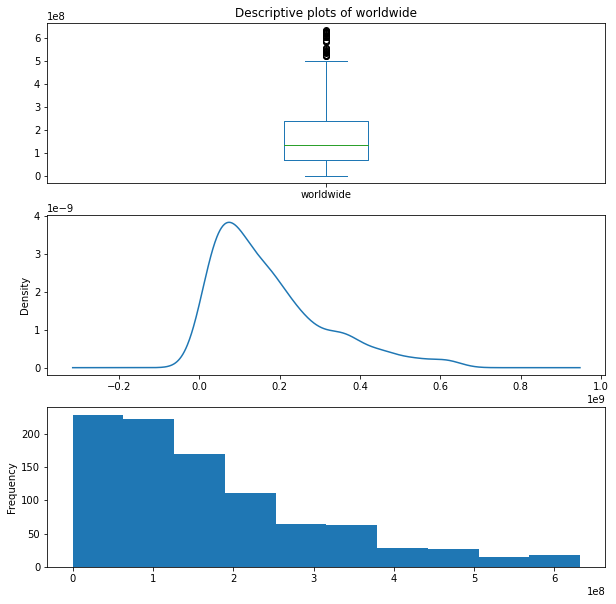

In [231]:
for col in movies_df.columns:
    visualize_srs(movies_df[col], col)

# Merge data sets

In [35]:
ratings_df = pd.read_csv("data_rating.csv")
ratings_df

,user_id,movie_id,rating
0,u00001,m0004,4.0
1,u00001,m0011,3.5
2,u00001,m0024,2.0
3,u00001,m0033,4.0
4,u00001,m0048,4.0
...,...,...,...
3363768,u10249,m1138,3.0
3363769,u10249,m1139,2.5
3363770,u10249,m1140,3.0
3363771,u10249,m1141,3.5


### Check for duplicates

In [36]:
ratings_df[ratings_df.duplicated(keep=False)]

,user_id,movie_id,rating


In [37]:
ratings_df.dtypes

user_id      object
movie_id     object
rating      float64
dtype: object

In [38]:
ratings_df.isnull().sum()

user_id     0
movie_id    0
rating      0
dtype: int64

In [39]:
merged_df = movies_df.merge(ratings_df, right_on = "movie_id", left_on = "movie_id", how = "right") # Merge based on movie_id
merged_df

,movie_id,title,year,release,trivia,mpaa,run_time,director,writer,producer,...,main_actor_2,main_actor_3,main_actor_4,budget,domestic,worldwide,genre_1,genre_2,user_id,rating
0,m0004,Terminator 2: Judgment Day,1991.0,1991-07-02,"A cyborg, identical to the one who failed to k...",R,137.0,James Cameron,James Cameron,James Cameron,...,Linda Hamilton,Edward Furlong,Robert Patrick,102000000.0,205881154.0,520884847.0,Action,Sci-Fi,u00001,4.0
1,m0011,Alien 3,1992.0,1992-05-21,"After her last encounter, Ellen Ripley crash-l...",R,114.0,David Fincher,Dan O'Bannon,Gordon Carroll,...,Charles S. Dutton,Charles Dance,Paul McGann,50000000.0,55473545.0,159814498.0,Action,Horror,u00001,3.5
2,m0024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,u00001,2.0
3,m0033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,u00001,4.0
4,m0048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,u00001,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363768,m1138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,u10249,3.0
3363769,m1139,Annihilation,2018.0,2018-02-22,"A biologist signs up for a dangerous, secret e...",R,115.0,Alex Garland,Alex Garland,Eli Bush,...,Jennifer Jason Leigh,Tessa Thompson,Benedict Wong,40000000.0,32732301.0,43070915.0,Adventure,Drama,u10249,2.5
3363770,m1140,Ready Player One,2018.0,2018-03-27,When the creator of a virtual reality called t...,PG-13,140.0,Steven Spielberg,Zak Penn,Donald De Line,...,Olivia Cooke,Ben Mendelsohn,Lena Waithe,175000000.0,137690172.0,582890172.0,Action,Adventure,u10249,3.0
3363771,m1141,A Quiet Place,2018.0,2018-04-03,"In a post-apocalyptic world, a family is force...",PG-13,90.0,John Krasinski,Bryan Woods,Michael Bay,...,John Krasinski,Millicent Simmonds,Noah Jupe,17000000.0,188024361.0,340939361.0,Drama,Horror,u10249,3.5


Missing values are from ratings for movies that do not exist (movies were removed during the cleaning step)

In [40]:
merged_df.isnull().sum()

movie_id             0
title           733682
year            733682
release         733682
trivia          733682
mpaa            733682
run_time        733682
director        733682
writer          733682
producer        733682
composer        733682
main_actor_1    733682
main_actor_2    733682
main_actor_3    733682
main_actor_4    733682
budget          733682
domestic        733682
worldwide       733682
genre_1         733682
genre_2         733682
user_id              0
rating               0
dtype: int64

In [41]:
merged_df.dropna(inplace=True) 

In [42]:
# merged_df.to_csv("merged_df.csv")

# Reading Merged Df

In [141]:
train0df = merged_df

In [142]:
train0df.drop(columns = ["trivia", "release", "movie_id"], inplace=True) # dropping index and unused features

KeyError: "['trivia' 'release' 'movie_id'] not found in axis"

In [143]:
train0df.head()

,title,year,mpaa,run_time,director,writer,producer,composer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,worldwide,genre_1,genre_2,user_id,rating
0,Terminator 2: Judgment Day,1991.0,R,137.0,James Cameron,James Cameron,James Cameron,Brad Fiedel,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,102000000.0,205881154.0,520884847.0,Action,Sci-Fi,u00001,4.0
1,Alien 3,1992.0,R,114.0,David Fincher,Dan O'Bannon,Gordon Carroll,Elliot Goldenthal,Sigourney Weaver,Charles S. Dutton,Charles Dance,Paul McGann,50000000.0,55473545.0,159814498.0,Action,Horror,u00001,3.5
6,Johnny Mnemonic,1995.0,R,96.0,Robert Longo,William Gibson,Don Carmody,Mychael Danna,Keanu Reeves,Dolph Lundgren,Dina Meyer,Ice-T,26000000.0,19075720.0,19075720.0,Action,Drama,u00001,4.0
7,Judge Dredd,1995.0,R,96.0,Danny Cannon,John Wagner,Charles Lippincott,Alan Silvestri,Sylvester Stallone,Armand Assante,Rob Schneider,Jürgen Prochnow,90000000.0,34693481.0,113493481.0,Action,Crime,u00001,3.0
8,The Usual Suspects,1995.0,R,106.0,Bryan Singer,Christopher McQuarrie,Michael McDonnell,John Ottman,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin,6000000.0,23341568.0,23341568.0,Crime,Mystery,u00001,5.0


In [144]:
train0df.describe()

,year,run_time,budget,domestic,worldwide,rating
count,2.630091e+06,2.630091e+06,2.630091e+06,2.630091e+06,2.630091e+06,2.630091e+06
mean,2.003154e+03,1.152522e+02,6.118144e+07,9.405345e+07,2.051857e+08,3.306051e+00
std,5.690170e+00,1.761091e+01,4.328583e+07,6.168248e+07,1.497518e+08,1.019609e+00
min,1.990000e+03,7.700000e+01,7.000000e+03,3.047100e+04,3.047100e+04,5.000000e-01
25%,1.999000e+03,1.020000e+02,2.600000e+07,4.422944e+07,8.601306e+07,3.000000e+00
50%,2.003000e+03,1.140000e+02,5.200000e+07,8.007074e+07,1.729897e+08,3.500000e+00
75%,2.007000e+03,1.270000e+02,8.800000e+07,1.323843e+08,2.969388e+08,4.000000e+00
max,2.018000e+03,1.680000e+02,1.900000e+08,2.676650e+08,6.317462e+08,5.000000e+00


# Feature Selection

## Correlation between numerical features and ratings

In [145]:
train0df.corr()

,year,run_time,budget,domestic,worldwide,rating
year,1.000000,0.029333,0.172299,0.078262,0.134185,0.090559
run_time,0.029333,1.000000,0.286124,0.111963,0.189603,0.128637
budget,0.172299,0.286124,1.000000,0.514877,0.611363,-0.091040
domestic,0.078262,0.111963,0.514877,1.000000,0.900361,-0.014907
worldwide,0.134185,0.189603,0.611363,0.900361,1.000000,-0.002352
rating,0.090559,0.128637,-0.091040,-0.014907,-0.002352,1.000000


<AxesSubplot:>

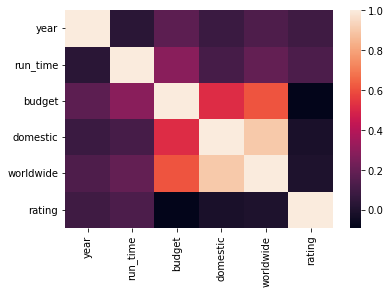

In [146]:
corr = train0df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Categorizing numerical features (4 categories)
There are many ways to perform naive Bayes classification (NBC). A common technique in NBC is to recode the feature (variable) values into quartiles, such that values less than the 25th percentile are assigned a 1, 25th to 50th a 2, 50th to 75th a 3 and greater than the 75th percentile a 4. Thus a single object will deposit one count in bin Q1, Q2, Q3, or Q4.

In [147]:
numeric_features = train0df.select_dtypes(np.number).columns.tolist()
numeric_features.remove("rating") # Remove rating from list of numeric features to convert to categories, since ratings follow it's own rules
numeric_features

['year', 'run_time', 'budget', 'domestic', 'worldwide']

In [148]:
train1df = train0df.copy()
for col in numeric_features:
    train1df[col] = pd.qcut(x = train1df[col], q = 4, labels = ["1", "2", "3", "4"]) # Cut and relabel based on quartiles

# Converting Ratings to categories

In [149]:
def categorize_ratings(row):
    if row >= 4.0:
        return "TRUE"
    else:
        return "FALSE"

In [150]:
train1df["rating_cat"] = train1df["rating"].apply(categorize_ratings)

In [151]:
train1df.drop(columns = ["rating"], inplace=True)

In [152]:
train1df.head()

,title,year,mpaa,run_time,director,writer,producer,composer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,worldwide,genre_1,genre_2,user_id,rating_cat
0,Terminator 2: Judgment Day,1,R,4,James Cameron,James Cameron,James Cameron,Brad Fiedel,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,4,4,4,Action,Sci-Fi,u00001,TRUE
1,Alien 3,1,R,2,David Fincher,Dan O'Bannon,Gordon Carroll,Elliot Goldenthal,Sigourney Weaver,Charles S. Dutton,Charles Dance,Paul McGann,2,2,2,Action,Horror,u00001,FALSE
6,Johnny Mnemonic,1,R,1,Robert Longo,William Gibson,Don Carmody,Mychael Danna,Keanu Reeves,Dolph Lundgren,Dina Meyer,Ice-T,1,1,1,Action,Drama,u00001,TRUE
7,Judge Dredd,1,R,1,Danny Cannon,John Wagner,Charles Lippincott,Alan Silvestri,Sylvester Stallone,Armand Assante,Rob Schneider,Jürgen Prochnow,4,1,2,Action,Crime,u00001,FALSE
8,The Usual Suspects,1,R,2,Bryan Singer,Christopher McQuarrie,Michael McDonnell,John Ottman,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin,1,1,1,Crime,Mystery,u00001,TRUE


<AxesSubplot:>

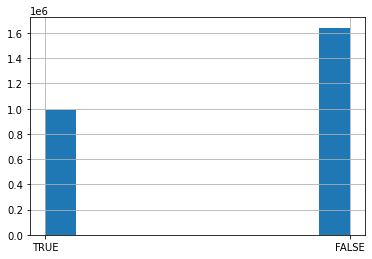

In [153]:
train1df["rating_cat"].hist()

## Convert all dtypes to Category

In [154]:
for col in train1df.columns:
    train1df[col] = train1df[col].astype("category")

In [155]:
train1df.dtypes

title           category
year            category
mpaa            category
run_time        category
director        category
writer          category
producer        category
composer        category
main_actor_1    category
main_actor_2    category
main_actor_3    category
main_actor_4    category
budget          category
domestic        category
worldwide       category
genre_1         category
genre_2         category
user_id         category
rating_cat      category
dtype: object

## Separating features and labels

In [156]:
X = train1df.iloc[:,0:-1] # X is the features in our dataset
y = train1df.iloc[:,-1]   # y is the Labels in our dataset


## Converting String Labels to Text Labels

In [157]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder() # drop first column to avoid dummy variable trap
X_encoded = encoder.fit_transform(X)

X_encoded

array([[6.5700e+02, 0.0000e+00, 3.0000e+00, ..., 0.0000e+00, 1.5000e+01,
        0.0000e+00],
       [3.7000e+01, 0.0000e+00, 3.0000e+00, ..., 0.0000e+00, 1.0000e+01,
        0.0000e+00],
       [3.5900e+02, 0.0000e+00, 3.0000e+00, ..., 0.0000e+00, 6.0000e+00,
        0.0000e+00],
       ...,
       [5.2000e+01, 3.0000e+00, 3.0000e+00, ..., 1.0000e+00, 6.0000e+00,
        1.0248e+04],
       [5.2700e+02, 3.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0248e+04],
       [2.7000e+01, 3.0000e+00, 2.0000e+00, ..., 7.0000e+00, 1.0000e+01,
        1.0248e+04]])

In [158]:
X_encoded = pd.DataFrame(X_encoded, columns = X.columns)

In [159]:
X_encoded.head()

,title,year,mpaa,run_time,director,writer,producer,composer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,worldwide,genre_1,genre_2,user_id
0,657.0,0.0,3.0,3.0,187.0,271.0,215.0,37.0,22.0,366.0,189.0,635.0,3.0,3.0,3.0,0.0,15.0,0.0
1,37.0,0.0,3.0,1.0,100.0,123.0,191.0,87.0,339.0,93.0,97.0,588.0,1.0,1.0,1.0,0.0,10.0,0.0
2,359.0,0.0,3.0,0.0,394.0,691.0,135.0,188.0,213.0,158.0,173.0,297.0,0.0,0.0,0.0,0.0,6.0,0.0
3,360.0,0.0,3.0,0.0,90.0,343.0,80.0,6.0,347.0,38.0,574.0,408.0,3.0,0.0,1.0,0.0,4.0,0.0
4,852.0,0.0,3.0,1.0,60.0,100.0,355.0,139.0,222.0,195.0,101.0,709.0,0.0,0.0,0.0,5.0,13.0,0.0


# Train Test Split

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3) 

# Model Evaluation

## All Features

In [64]:
from sklearn.naive_bayes import CategoricalNB

model = CategoricalNB().fit(X_train, y_train) #fitting our model

In [65]:
predicted_y = model.predict(X_test) #now predicting our model to our test dataset

In [66]:
from sklearn.metrics import f1_score
# F measure score
f1_score_all = f1_score(y_test, predicted_y, pos_label='TRUE') 
print (f1_score_all)

0.5973719897124152


### Check Feature Importance with Permutation Importance

In [133]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0228 ± 0.0001,user_id
0.0001 ± 0.0001,domestic
-0.0000 ± 0.0001,year
-0.0001 ± 0.0001,worldwide
-0.0001 ± 0.0002,budget
-0.0004 ± 0.0002,mpaa
-0.0009 ± 0.0001,genre_2
-0.0010 ± 0.0001,genre_1
-0.0011 ± 0.0002,run_time
-0.0021 ± 0.0000,composer


# Iteratively Testing Feature Sets

In [67]:
top_features = ["user_id", "domestic", "year", "worldwide", "budget", "mpaa", "genre_2", "genre_1", "run_time", "composer", "main_actor_1", "producer", "main_actor_3", "title", "main_actor_2", "main_actor_4", "writer", "director"]

In [68]:
len(top_features)

18

In [69]:
top_features[0:15]

['user_id',
 'domestic',
 'year',
 'worldwide',
 'budget',
 'mpaa',
 'genre_2',
 'genre_1',
 'run_time',
 'composer',
 'main_actor_1',
 'producer',
 'main_actor_3',
 'title',
 'main_actor_2']

In [70]:
for i in range(1,18):
    temp_feats = top_features[0:i]
    X_train_temp = X_train[temp_feats]
    X_test_temp = X_test[temp_feats]
    model_temp = CategoricalNB().fit(X_train_temp, y_train) #fitting our model
    pred_y_temp = model_temp.predict(X_test_temp) #now predicting our model to our test dataset
    f1_score_temp = f1_score(y_test, pred_y_temp, pos_label='TRUE') 
    print(f"{str(i)} features yields an F1 score of {str(f1_score_temp)}")   

1 features yields an F1 score of 0.5087540700164013
2 features yields an F1 score of 0.5100743040564032
3 features yields an F1 score of 0.5141165572516009
4 features yields an F1 score of 0.517744926444967
5 features yields an F1 score of 0.5274561327138753
6 features yields an F1 score of 0.536209565188538
7 features yields an F1 score of 0.545577652917743
8 features yields an F1 score of 0.5553805138148327
9 features yields an F1 score of 0.5611986364039399
10 features yields an F1 score of 0.5780270718262268
11 features yields an F1 score of 0.5923899457430666
12 features yields an F1 score of 0.6002128390209406
13 features yields an F1 score of 0.6066296136822188
14 features yields an F1 score of 0.6077417337757672
15 features yields an F1 score of 0.6037541431793458
16 features yields an F1 score of 0.6021766906783876
17 features yields an F1 score of 0.5995274076884841


# Confusion Matrix of Best Performing Model

In [71]:
best_features = top_features[0:14]

In [72]:
len(best_features)

14

In [74]:
final_model = CategoricalNB().fit(X_train[best_features], y_train) #fitting our model
final_y_pred = final_model.predict(X_test[best_features]) #now predicting our model to our test dataset

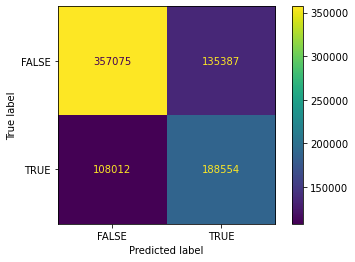

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, final_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()

# Results from question_movie.csv

In [212]:
movies_df.head()

,movie_id,title,year,release,trivia,mpaa,run_time,director,writer,producer,composer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,worldwide,genre_1,genre_2
0,m0001,Pretty Woman,1990,1990-03-22,A man in a legal but hurtful business needs an...,R,119.0,Garry Marshall,J.F. Lawton,Arnon Milchan,James Newton Howard,Richard Gere,Julia Roberts,Jason Alexander,Laura San Giacomo,14000000.0,178406268.0,463406268.0,Comedy,Romance
1,m0002,The Godfather: Part III,1990,1990-12-24,In the midst of trying to legitimize his busin...,R,162.0,Francis Ford Coppola,Mario Puzo,Francis Ford Coppola,Carmine Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,54000000.0,66666062.0,136766062.0,Crime,Drama
2,m0003,Thelma & Louise,1991,1991-05-23,"Two best friends set out on an adventure, but ...",R,130.0,Ridley Scott,Callie Khouri,Mimi Polk Gitlin,Hans Zimmer,Susan Sarandon,Geena Davis,Harvey Keitel,Michael Madsen,16500000.0,45360915.0,45434805.0,Adventure,Crime
3,m0004,Terminator 2: Judgment Day,1991,1991-07-02,"A cyborg, identical to the one who failed to k...",R,137.0,James Cameron,James Cameron,James Cameron,Brad Fiedel,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,102000000.0,205881154.0,520884847.0,Action,Sci-Fi
4,m0005,Boyz n the Hood,1991,1991-07-11,Follows the lives of three young males living ...,R,112.0,John Singleton,John Singleton,Steve Nicolaides,Stanley Clarke,Cuba Gooding Jr.,Laurence Fishburne,Hudhail Al-Amir,Lloyd Avery II,6500000.0,57504069.0,57529070.0,Crime,Drama


In [213]:
eval_df = pd.read_csv("question_movie.csv")

In [214]:
eval_df.head()

,order,user_id,movie_id,recommend
0,1,u00005,m0328,NaN
1,2,u00007,m0103,NaN
2,3,u00021,m0708,NaN
3,4,u00038,m0994,NaN
4,5,u00043,m1126,NaN


In [215]:
title = movies_df[movies_df["movie_id"] == "m0328"]
title

,movie_id,title,year,release,trivia,mpaa,run_time,director,writer,producer,composer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,worldwide,genre_1,genre_2
327,m0328,"Dude, Where's My Car?",2000,2000-12-14,Two potheads wake up after a night of partying...,PG-13,83.0,Danny Leiner,Philip Stark,Broderick Johnson,David Kitay,Ashton Kutcher,Seann William Scott,Jennifer Garner,Marla Sokoloff,13000000.0,46729800.0,73180723.0,Comedy,Mystery


In [216]:
movies_df[movies_df["movie_id"] == "m0328"]

,movie_id,title,year,release,trivia,mpaa,run_time,director,writer,producer,composer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,worldwide,genre_1,genre_2
327,m0328,"Dude, Where's My Car?",2000,2000-12-14,Two potheads wake up after a night of partying...,PG-13,83.0,Danny Leiner,Philip Stark,Broderick Johnson,David Kitay,Ashton Kutcher,Seann William Scott,Jennifer Garner,Marla Sokoloff,13000000.0,46729800.0,73180723.0,Comedy,Mystery


In [217]:
train1df.head()

,title,year,mpaa,run_time,director,writer,producer,composer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,worldwide,genre_1,genre_2,user_id,rating_cat
0,Terminator 2: Judgment Day,1,R,4,James Cameron,James Cameron,James Cameron,Brad Fiedel,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,4,4,4,Action,Sci-Fi,u00001,TRUE
1,Alien 3,1,R,2,David Fincher,Dan O'Bannon,Gordon Carroll,Elliot Goldenthal,Sigourney Weaver,Charles S. Dutton,Charles Dance,Paul McGann,2,2,2,Action,Horror,u00001,FALSE
6,Johnny Mnemonic,1,R,1,Robert Longo,William Gibson,Don Carmody,Mychael Danna,Keanu Reeves,Dolph Lundgren,Dina Meyer,Ice-T,1,1,1,Action,Drama,u00001,TRUE
7,Judge Dredd,1,R,1,Danny Cannon,John Wagner,Charles Lippincott,Alan Silvestri,Sylvester Stallone,Armand Assante,Rob Schneider,Jürgen Prochnow,4,1,2,Action,Crime,u00001,FALSE
8,The Usual Suspects,1,R,2,Bryan Singer,Christopher McQuarrie,Michael McDonnell,John Ottman,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin,1,1,1,Crime,Mystery,u00001,TRUE


In [218]:
def find_movie(row):
    try:
        title = movies_df[movies_df["movie_id"] == row["movie_id"]]["title"].iloc[0]
    except:
        return "FALSE"
    
    movie_row = train1df[train1df["title"] == title]

    movie_row.drop(columns = ["rating_cat"], inplace=True)
    movie_row["user_id"] = row["user_id"]
    encoded = encoder.transform(movie_row)
    encode_df = pd.DataFrame(encoded, columns = movie_row.columns)
    return final_model.predict(encode_df[best_features].head(1))[0]

    

In [219]:
eval_df["recommend"] = eval_df.apply(find_movie, axis = 1)
eval_df

,order,user_id,movie_id,recommend
0,1,u00005,m0328,FALSE
1,2,u00007,m0103,FALSE
2,3,u00021,m0708,TRUE
3,4,u00038,m0994,TRUE
4,5,u00043,m1126,TRUE
...,...,...,...,...
995,996,u10220,m0153,TRUE
996,997,u10223,m0488,FALSE
997,998,u10230,m0931,TRUE
998,999,u10232,m0196,FALSE


<AxesSubplot:>

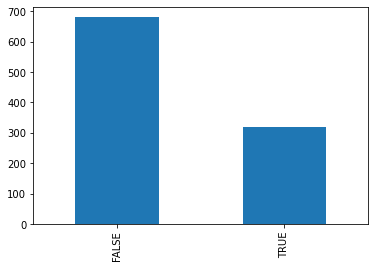

In [220]:
eval_df["recommend"].value_counts().plot(kind = "bar")

In [221]:
eval_df.to_csv("Evaluation_results.csv")